# K-Nearest Neighbors (KNN)

KNN is a simple, non-parametric machine learning algorithm that makes predictions by looking at the **k closest data points** in the training set and deciding based on their majority label (for classification) or average value (for regression).

---

## Steps of KNN
1. **Store all the training data** (KNN is a "lazy learner" – it doesn’t build a model in advance).  
2. **Choose a value of `k`** (number of neighbors to consider).  
3. **For a new data point:**
   - Compute its distance from all training points.  
   - Pick the *k* nearest neighbors.  
4. **Prediction:**
   - For **classification** → majority vote of neighbors.  
   - For **regression** → take the average of neighbors.  

---

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix ,classification_report
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data_set_local/breast_cancer_wisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The **Breast Cancer Wisconsin dataset** is a popular benchmark for testing classification algorithms.  
It contains cell nuclei features from digitized images of breast mass tissue, and the task is to classify tumors as:

- **Malignant (M)** → Cancerous (label = 1)  
- **Benign (B)** → Non-cancerous (label = 0)  

## How KNN Works Here
1. Each tumor is represented as a **vector of measurements** (like radius, texture, perimeter, area, etc.).  
2. When a new tumor sample comes in, KNN:  
   - Calculates its distance to all tumors in the training set.  
   - Finds the *k* closest neighbors (we’ll start with k=5).  
   - Assigns the label based on **majority vote** of those neighbors.  

In simple terms: *“Tell me what my closest neighbors are, and I’ll copy their diagnosis.”*

In [19]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head())

Shape of dataset: (569, 31)

Missing values:
 diagnosis         0
radius_mean       0
texture_mean      0
perimeter_mean    0
area_mean         0
dtype: int64


In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
#high level overview of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
# dropped columns id ,Unnamed: 32 as doesn't seems relevant
df = df.drop(columns= ['id' ,'Unnamed: 32'])

In [15]:
#high level overview of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Note: The main goal here is to understand the working of the **KNN algorithm**.  
For that reason, I am not going into a detailed **Exploratory Data Analysis (EDA)** of the dataset.  
Instead, I will directly focus on building the KNN model and evaluating its performance.


In [21]:
# feature and target
X = df.drop(columns= 'diagnosis')
y = df['diagnosis']

In [22]:
# Encode labels: M = 1 (Malignant), B = 0 (Benign)
y = df['diagnosis'].map({'M':1, 'B':0})

In [23]:
# train test split
X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size= 0.3 ,random_state=42)

## Why Scaling is Important
Since KNN relies on **distance calculations**, features like *radius* (in tens) would otherwise dominate features like *smoothness* (fractions).  
That’s why we apply **StandardScaler** → so all features have equal influence.

In [24]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# training model
knn = KNeighborsClassifier(n_neighbors=5) # default 5
knn.fit(X_train ,y_train)

KNeighborsClassifier()

In [28]:
# predictions
y_pred = knn.predict(X_test)

In [30]:
# model evaluation
print("Accuracy score is :" ,accuracy_score(y_test , y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy score is : 0.9590643274853801

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix:
 [[105   3]
 [  4  59]]


# Choosing the Right Number of Neighbors (k)

Since KNN relies on the user to provide the value of **n_neighbors (k)**,  
choosing the right k is very important. There are mainly two approaches:

1. **Experimental / Manual Search**  
   - Try different values of k (like 1 to 20)  
   - Compare accuracy (or other metrics)  
   - Pick the k which gives the best balance between underfitting and overfitting.  

2. **Cross-Validation Based Search**  
   - Use techniques like **GridSearchCV** or **cross-validation**.  
   - The dataset is split into multiple folds, and the model is tested on each fold.  
   - The best k is chosen automatically based on performance across folds.  

In this notebook, we’ll start with the **experimental approach** by testing a range of k values and plotting their accuracies.


**Experimental / Manual Search**

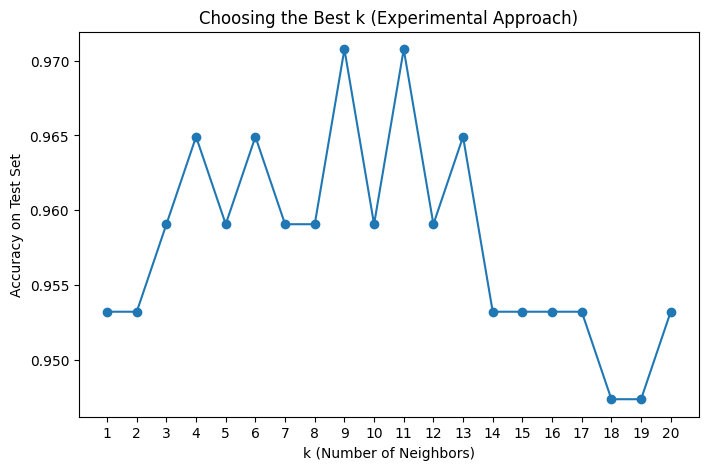

Best k (experimental) = 9 with accuracy = 0.9707602339181286


In [34]:
# try different values of k
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# plot accuracy vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, scores, marker='o')
plt.title("Choosing the Best k (Experimental Approach)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.show()

# best k from this experiment
best_k = k_values[np.argmax(scores)]
print("Best k (experimental) =", best_k, "with accuracy =", max(scores))


From the experimental plot, we can notice:

- For very small values of k (like k=1), the model may overfit → accuracy can fluctuate a lot.  
- As k increases, the decision boundary becomes smoother and the model generalizes better.  
- Beyond a certain point, if k is too large, the model may underfit because it starts considering too many neighbors (even from the opposite class).  

In our case, the accuracy seems to stabilize around **k = 9**,  
which matches the value suggested by cross-validation.  

This shows why choosing the right k is important — it’s a balance between **variance** (overfitting) and **bias** (underfitting).


**Cross-Validation Based Search**

In [36]:
# Define parameter grid for k
param_grid = {'n_neighbors': range(1, 21)}

# GridSearch with 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best k (cross-validation):", grid.best_params_['n_neighbors'])
print("Best CV accuracy:", grid.best_score_)

Best k (cross-validation): 3
Best CV accuracy: 0.9597784810126582


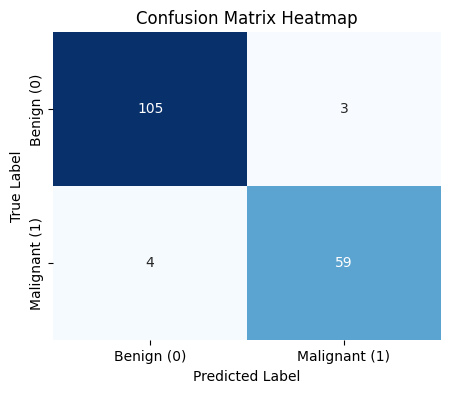

In [40]:
# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


# When KNN Works Well

- Works best on **small to medium-sized datasets** where computation is manageable.  
  Example: Classifying whether an email is spam or not in a dataset with a few thousand emails.  

- Performs well when **data is well-separated into classes**.  
  Example: Distinguishing apples vs bananas based on simple features like color and size.  

- Effective when **features are normalized/scaled properly**, so no single  feature dominates distance.  
  Example: In a health dataset, age (in years) and cholesterol (in mg/dL) need to be on similar scales; otherwise, age might overshadow everything.  

- Useful as a **baseline model** because it’s simple and easy to implement.  
  Example: Before deploying a complex neural network for image classification, you can quickly test KNN to see if the data has clear separability.  

- Can handle **multi-class classification** without major changes.  
  Example: Classifying types of flowers (setosa, versicolor, virginica) in the classic Iris dataset.  

---

# Limitations of KNN

While KNN is simple and easy to understand, it also has some limitations:

- **Computationally expensive**: Every prediction requires calculating distances to all training points. This makes it slow for large datasets.  
  Example: Predicting in a dataset with millions of images would take forever because KNN checks each image one by one.  

- **High memory usage**: The algorithm needs to store the entire training dataset.  
  Example: Unlike linear regression, you can’t just store coefficients — you have to keep all training points in memory.  

- **Sensitive to irrelevant features & scaling**: If data is not normalized, features with larger scales can dominate the distance calculation.  
  Example: If height (in cm) and weight (in kg) are used without scaling, height values will dominate because they are numerically larger.  

- **Curse of dimensionality**: As the number of features grows, distances between points become less meaningful, reducing performance.  
  Example: With 1000 features, two completely different samples may still look “equally distant,” making KNN confused.  

- **Choice of k is critical**: Too small → overfitting. Too large → underfitting.  
  Example: With k=1, a noisy outlier can decide the label. With k=100, the model may ignore local patterns.  

- **Does not perform well on imbalanced datasets**: Predictions may be biased toward the majority class because it dominates the neighbor votes.  
  Example: If 90% of patients are healthy and 10% have a disease, KNN will often predict “healthy” just because neighbors are mostly from the majority class.  


# Conclusion

In this notebook, we explored the working of the **K-Nearest Neighbors (KNN)** algorithm using the breast cancer dataset.  
We trained the model, evaluated its performance, and experimented with different values of k using both manual testing and cross-validation.  
This gave us a clear, hands-on understanding of how KNN works and why the choice of k is so important.

---

🙏 Thank you for taking the time to read through this notebook!  
I hope you found it useful and enjoyable.  

If you have any questions or suggestions, feel free to connect with me.  
You can also check out my other projects here:  
🔗 [My GitHub](https://github.com/Aman-sys-ui)  
